<a href="https://colab.research.google.com/github/wangjuan001/sandbox2019/blob/master/Copy_of_Part_3_NLTK_NextSteps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Analysis

**In this part we focus on tools that help you analyze the content of a text.**

**Goals**
<ol>
    <li> Analyze words using a concordance </li>
    <li> Create a dispersion plot </li>
    <li> Compare tokens between texts </li>
    <li> Map from text to sounds to look at syllable distributions </li>
    <li> Stem the data to look at word meanings </li>
    <li> Tag the tokens with their part of speech using a tagger and dictionary</li>
</ol>

In [ ]:
## FOR GOOGLE COLAB
# If you are using Google Colab, first run the code cell below. You can run a cell by clicking in the cell and clicking on the arrow that appears on the left side of the cell. DO NOT run this cell if you are not using Google Colab.

!wget "https://raw.githubusercontent.com/turnerdan/nltk_tutorial_2020/master/shakespeare.txt"
!wget "https://github.com/turnerdan/nltk_tutorial_2020/blob/master/shakespeare_raw.pkl?raw=true"
!wget "https://github.com/turnerdan/nltk_tutorial_2020/blob/master/shakespeare_text.pkl?raw=true"
!wget "https://github.com/turnerdan/nltk_tutorial_2020/blob/master/shakespeare_tokens.pkl?raw=true"
!wget "https://raw.githubusercontent.com/turnerdan/nltk_tutorial_2020/master/walden.txt"
!wget "https://github.com/turnerdan/nltk_tutorial_2020/blob/master/walden_clean_tokens.pkl?raw=true"
!wget "https://github.com/turnerdan/nltk_tutorial_2020/blob/master/walden_raw.pkl?raw=true"
!wget "https://github.com/turnerdan/nltk_tutorial_2020/blob/master/walden_text.pkl?raw=true"


--2020-08-13 18:20:00--  https://raw.githubusercontent.com/turnerdan/nltk_tutorial_2020/master/shakespeare.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5784660 (5.5M) [text/plain]
Saving to: ‘shakespeare.txt.1’

shakespeare.txt.1   100%[===================>]   5.52M  19.2MB/s    in 0.3s    

2020-08-13 18:20:01 (19.2 MB/s) - ‘shakespeare.txt.1’ saved [5784660/5784660]

--2020-08-13 18:20:01--  https://github.com/turnerdan/nltk_tutorial_2020/blob/master/shakespeare_raw.pkl?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/turnerdan/nltk_tutorial_2020/raw/master/shakespeare_raw.pkl [following]
--2020-08

In [ ]:
###########
## Setup ##
###########

## This new notebook is a new environment, so we have to set it up again.

# Import packages
from nltk import *
import pickle
import matplotlib.pyplot as plt
import pandas as pd 
import string
from nltk.corpus import cmudict
from nltk.corpus import stopwords
from IPython.display import display, HTML

# Import the Walden data we saved from the Text Cleaning chapter
walden_tokens = pickle.load( open( "walden_clean_tokens.pkl?raw=true", "rb" ) )
walden_text = pickle.load( open( "walden_text.pkl?raw=true", "rb" ) )
walden_raw = pickle.load( open( "walden_raw.pkl?raw=true", "rb" ) )
shakespeare_tokens = pickle.load( open( "shakespeare_tokens.pkl?raw=true", "rb" ) )


## Concordances

Concordances align one token across multple contexts so we can see at a glance how the word is being used. This can be very useful for understanding how two similar words might be used differently. We will use a concordance to compare "wisdom" and "knowledge" in the next code block to see how they work.

>The next code block generates concordances for two words that share much of their meaning. If concordances can show differences in their meaning (by their context) then we will know more about how the words are used in Walden.


In [ ]:
###########################
## Generate concordances ##
###########################

# Concordance for "wisdom"
walden_text.concordance("wisdom")

# Add a new line to separate the concordances
print("\n")


# Note that > print("\nConcordance for Knowledge") < would give the exact same result

# Concordance for "knowledge"
walden_text.concordance("knowledge")

Displaying 11 of 11 matches:
ork . But it is a characteristic of wisdom not to do desperate things . When w
 to found a school , but so to love wisdom as to live according to its dictate
 but think that if we had more true wisdom in these respects , not only less e
than common use permits out of what wisdom and valor and generosity we have . 
erchance have been convicted by the wisdom of one good book , the Bible , and 
 classics ; and as for the recorded wisdom of mankind , the ancient classics a
 heard him speak or attended to the wisdom of his words . But how actually is 
ords and his life . Moreover , with wisdom we shall learn liberality . The sol
hough without more humanity or even wisdom ; at present I am no fisherman at a
 we have heard . From exertion come wisdom and purity ; from sloth ignorance a
erely the purity of infancy , but a wisdom clarified by experience . Such an e


Displaying 9 of 9 matches:
uires- who has so often to use his knowledge ? We should feed and clothe 

### **Comparing "knowledge" and "wisdom" in Walden**

Maybe:
* wisdom seems to be something that can be conveyed through text (recorded, in the Bible) and is a characteristic of humans (perhaps versus animals)
* knowledge seems to be easier to qualify--masters have more of it but much happens "without" it


## Contextual similarity
It can be difficult to compare concordances as they are displayed above, so it's common to look at contextual similarity. 

We will look at two functions that exploit this linguistic fact to find patterns in word use.

<ul>
<li>common_contexts() takes a set of tokens and returns the words that immediately precede and follow all words in the set.

<li>similar() takes a token and returns other tokens that appear in the same context as itself.
<ul>


In [ ]:
########################################################
## Compare common token contexts and token similarity ##
########################################################

## common_contexts()
# Print common contexts for 'ice' and 'water'
print("Common contexts for 'ice' and 'water'") # Title
walden_text.common_contexts(["ice", "water"])

## similiar()
# Print similar tokens for 'water'
print("\nTerms similar to 'water'") # Title
walden_text.similar("water")

# Print similar tokens for 'ice'
print("\nTerms similar to 'ice'") # Title
walden_text.similar("ice")

Common contexts for 'ice' and 'water'
the_in the_, in_and the_and of_. the_with the_itself the_is the_.
the_was the_were the_; of_, the_over the_of walden_.

Terms similar to 'water'
ice pond it sun world man light earth woods air life spring time night
summer winter shore snow which other

Terms similar to 'ice'
pond water woods sun shore world earth air man day night ground land
time house village bottom rest birds light


### **Comparing similarity of "water" and "ice" in Walden**

Based on the *common contexts* it appears that:
* both are nouns (follows 'the' and prepositions like 'in' and 'of')
* both are at Walden (follows walden)
* both are in the other's similar terms
* water is similar to 'spring' -- which is when the pond will turn from ice to unfrozen water
* ice is more similar to 'birds' -- maybe because ice restricts birds to the parts of the pond without it?



## Collocations

***As you have probably gathered, we can learn a lot about a word just by seeing it across many contexts.*** One special type of context has to do with words that frequently appear adjacent to one another. We say these tokens are collocated, meaning they appear together in the same location. Often these words are compound nouns, proper nouns, and idioms.

>**The next code block shows the 100 most frequent collocated token pairs. In other words, adjacent tokens that appear together the most.**

In [ ]:
download('stopwords')
#######################################
## List frequently collocated tokens ##
#######################################

# Get the top 100 collocated token pairs for the text
# Text() here transforms 'walden_tokens' into an NLTK text object, which is required for collocations()
Text( walden_tokens ).collocations(100)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
new england; years ago; pitch pine; three four; pitch pines; half
mile; time time; indian meal; many years; would fain; nineteenth
century; tea coffee; rye indian; flint pond; inlet outlet; greater
part; one day; hoo hoo; walden pond; new york; one another; quarter
mile; pines hickories; half hour; john field; hooting owl; every day;
shrub oaks; loch fyne; terra firma; thirty forty; four inches; brister
hill; surrounding hills; four five; across pond; inches diameter; feet
deep; could afford; spider web; civilized man; eight months; one
hundred; take place; log canoe; stony shore; gentlemen ladies; every
man; two three; summer winter; ten dollars; baker farm; fine arts;
fifteen years; rustling leaves; winter quarters; men women; half
dozen; king queen; written languages; fifty rods; circle round; golden
age; rods shore; early morning; azure tint; good deal; round round;
vital 

### **Let's categorize some of the types of collcated tokens we found:**

Proper nouns
* New England
* John Field
* Walden Pond

Predicates
* answer questions
* mastered difficulties
* hooting owl

Idioms
* take place
* beaten track
* good deal


## Unique tokens

So far, we have just looked at tokens within Walden and the complete works of Shakespeare. But how do they compare?

There are many reasons to think they are different. For one thing, Walden was written over 250 years after Shakespeare's death -- before the first English novel was written! Next we will learn what tokens are unique between these texts.

>**The next code block creates two lists of common tokens that are in one text but not the other.**

In [ ]:
############################################################
## List unique tokens in each text, relative to the other ##
############################################################

# Make sure both texts are lowercase
walden_lower = [token.lower() for token in walden_tokens]
shakespeare_lower = [token.lower() for token in shakespeare_tokens]

# Get the frequency distributions for our tokenized texts
walden_common = FreqDist( walden_lower )
shakespeare_common = FreqDist( shakespeare_lower )

# Get the 1000 most frequent tokens
# Save the token only (index 0), leaving the frequency (index 1) behind
walden_common = [token[0] for token in walden_common.most_common(1000)]
shakespeare_common = [token[0] for token in shakespeare_common.most_common(1000)]

# Convert our two lists of the 1000 most frequent tokens into sets, which removes duplicates
walden_common = set( walden_common )
shakespeare_common = set( shakespeare_common )              

# Extract all tokens in Walden that do not appear in Shakespeare
walden_special = walden_common.difference( shakespeare_common )

# Extract all tokens in Shakespeare that do not appear in Walden
shakespeare_special = shakespeare_common.difference( walden_common )

# Print a pretty two-column list--ignore the details here
print('%-8s%-20s%s' % ('', 'W NOT S', 'S NOT W'))
for i, (wald, shak) in enumerate(zip(sorted(walden_special), sorted(shakespeare_special))):
    print('%-8s%-20s%s' % (i, wald, shak))


        W NOT S             S NOT W
0       accident            aaron
1       according           achilles
2       account             act
3       acquaintance        action
4       acquainted          adieu
5       acres               agamemnon
6       across              ah
7       actually            ajax
8       advantage           andrew
9       afford              angelo
10      afternoon           angry
11      ages                anne
12      ago                 anon
13      alert               answer
14      also                antipholus
15      always              antonio
16      amid                antony
17      amount              apemantus
18      ancient             arcite
19      animal              arm
20      animals             armado
21      answered            arms
22      apparently          army
23      appeared            aside
24      appears             attend
25      appetite            attendants
26      approach            aufidius
27      april           

## Stemming

**What do "write", "writing", "written", "wrote", "writes", "writer", "rewrite", "rewrites" all have in common?**

They come from the same word, 'write', which we call the **stem** of the words in this list. We can programatically reduce each token to its stem using a process called *stemming*. Stemming the list above would result in each token being transformed into 'write'. Depending on what you're counting, you might even stem as part of your text cleaning.

> In the next code chunk, we stem each token in Walden.

In [ ]:
#################
## Stem Walden ##
#################

# Stem all of the cleaned tokens
walden_stems = [PorterStemmer().stem(t) for t in walden_tokens]

# Regenerate the frequency distribution across the tokens to extract the most common words
stem_frequencies = FreqDist( walden_stems )

# Query the frequency distribution to return the n most common words
common_stems = stem_frequencies.most_common( 20 )

# What forms were removed? We take the differences between the tokens and stems and save them as a list to walden_diff.
walden_diff = list(set(walden_tokens) - set(walden_stems))

# Just for fun, calculate the percentage of tokens removed
# We do this by dividing the number of tokens removed by the total, multiplying by 100, then rounding to the nearest integer using round().
walden_diff_percent = round((len(walden_diff) / len(walden_tokens)) * 100)

# How many word forms did stemming remove?
print("We removed", len(walden_diff), "word forms (", walden_diff_percent, "% of the token count ).")

# What do the tokens look like before stemming?
# Only show the first 50 tokens/stems
print("\nBefore stemming:\n", walden_diff[0:50])

print("\nAfter stemming:\n", walden_stems[0:50])

# alphabetically sort

We removed 6646 word forms ( 14 % of the token count ).

Before stemming:
 ['imagined', 'gravelly', 'occupy', 'vulpine', 'leaked', 'starts', 'imagine', 'heave', 'dragging', 'regretting', 'dashing', 'canvas', 'recommends', 'muddied', 'effectually', 'freeze', 'branches', 'iris', 'liberalizing', 'palate', 'sprouts', 'books', 'restlessness', 'cries', 'withe', 'using', 'wigwams', 'devoted', 'wares', 'ceiling', 'sufferance', 'unutterable', 'reverencing', 'haunted', 'cheerful', 'roots', 'dates', 'externally', 'fetched', 'certainly', 'indefinite', 'seriously', 'refine', 'scattered', 'ornithology', 'positive', 'knives', 'adding', 'cavities', 'deficient']

After stemming:
 ['townsmen', 'concern', 'mode', 'life', 'would', 'call', 'impertin', 'though', 'appear', 'impertin', 'consid', 'circumst', 'natur', 'pertin', 'ask', 'got', 'eat', 'feel', 'lonesom', 'afraid', 'like', 'other', 'curiou', 'learn', 'portion', 'incom', 'devot', 'charit', 'purpos', 'larg', 'famili', 'mani', 'poor', 'children', 'main

### Our 'primitive' stemmer did okay, but not great

To review our results quickly:

**Good stems**
* wood
* labor
* hand

**Bad stems**
* inquiri (inquiries - es)
* obtrud (I have no idea, do you?)
* economi (economics - cs)

If you are beginning to think you can build a better stemmer, you probably can.

For our purposes, mispelled words are ignored, meaning we will have some data loss. Unlike many numerical tasks, text processing often requires custom solutions because of the inherent variability in language.

## Tagging part of speech

**Another way to group tokens together is by part of speech (noun, verb, etc).**

To do this, we use the NLTK function `pos_tag()` which looks up each token in a dictionary and retreives the most common part of speech. The common parts of speech are noun (NN), verb (VB), adjective (JJ), and adverb (RB).

There are many more types and subtypes that NLTK labels using this function, which you can learn about it by runnning the function `help.upenn_tagset()`.

>In the following code block, we tag the part of speech of each stemmed token, convert it to a pandas series, and plot a histogram of the frequency of each type.

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


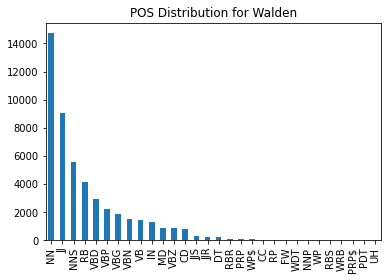

In [ ]:
##############################################
## Tag the tokens with their part of speech ##
##############################################
download('averaged_perceptron_tagger')
# Tag each token with its part of speech
walden_tagged = pos_tag( walden_tokens )

# Take only the tags (word is index 0, part of speech tag is index 1)
walden_tags = [x[1] for x in walden_tagged]

# Convert the list of POS tags to a pandas series for easy plotting
walden_tags = pd.Series(walden_tags)

walden_tags.value_counts().plot(kind='bar').title.set_text('POS Distribution for Walden')

## Named entity extraction

Say we want to find all of the proper names (NN in this part of speech tag set) for a text. You can imagine that you are building a script to automatically create a page index for a book. If you want to look up all of the pages that mention New York, for example, how would you do so?

> In the next code chunk, we will see how well the part of speech tagger finds proper nouns.


In [ ]:
################################################
## Find all of the tokens labeled proper down ##
################################################

# Loop all of the tagged tokens and print those where the tag is 'NPP' (= proper noun)

# Go tag by tag by indexing them one at a time using a loop
for i in range(0, len(walden_tagged)):
    
    # If the current word's ([i]) tag matches 'NNP', run the nested script
    if walden_tagged[i][1] == 'NNP':
        
        # Print the current word
        print( walden_tagged[i][0] )

# Save our list of NNPs to compare it with another method later
# This save each element in walden_tagged if its tag (position 1 in the list) is equal to 'NNP'
nnp_old = [x for x in walden_tagged if x[1] == 'NNP']

timber
knowledge
timber
milton
know
nobleman
knew
september
october
october
october
november
september


### **Not so good, but why?**

One way to tell whether a word is a proper noun in written English is capitalization, but we removed that information when we cleaned the text. Luckily for us, we can quickly create a new version of the data that is fairly clean and retains its capitalization.

## Regex solution

Regex is short for **regular expressions**, which is a way to write general pattern. For example, phone numbers are usually written in the same way: *an area code surrounded by parentheses, a space, three numbers, a hyphen, and four more numbers*. If we write this pattern as a regular expression, then we can programmatically extract every phone number formatted like this in a huge set of text.

Have you ever wondered how spammers found your phone number, address, and emails? It's because these kind of data are easy to extract from text posted online or electronically available.

>**In the next code chunk, I show two examples of how we can extract strings that match different regex patterns. The patterns are not as complicated as a phone number, but you can see the building blocks of this method.**


In [ ]:
###########
## Setup ##
###########

# Import regex package
import re 

# Import the raw text of Walden, replacing all new lines with a space, to make it one line
walden_raw_oneline = walden_raw.replace('\n', ' ')

####################
## Regex examples ##
####################

## Extract every 4-digit number in Walden (likely years)

# Pattern
# -------> In regex, "\d" matches any digit, so '\d\d\d\d' means a string of four digits
four_digit = '\d\d\d\d'

# Find all matches for the 'four_digit' pattern in 'walden_raw_oneline'
four_digit_result = re.findall(four_digit, walden_raw_oneline) #print(result)

# Print the list of matches as a set, to remove duplicates
print( "Four digits:", set( four_digit_result ) )


## Extract all capitalized words

# Pattern
# -------> In regex, "[A-Z] matches all capitalized words and [a-z] all lowercase. '*' matches everthing!
capitalized = '[A-Z][a-z]*'

# Find all matches for the 'capitalized' pattern in 'walden_raw_oneline'
capitalized_result = re.findall(capitalized, walden_raw_oneline)

# Print the list of matches as a set, to remove duplicates
print( "\nCapitalized:", set( capitalized_result ) )


Four digits: {'1812', '1824', '1743', '1674', '1846', '1650', '1847', '1742', '1848', '1717', '1845', '1850', '1649', '1842', '1792'}

Capitalized: {'Plymouth', 'Paphlagonian', 'Concordiensis', 'Sippio', 'Salem', 'Entertainments', 'About', 'Vulcan', 'Western', 'D', 'Solitude', 'Rustica', 'One', 'Bombay', 'Burgoyne', 'Thaw', 'Neither', 'Wast', 'Esquimau', 'Spenser', 'Atlas', 'Asia', 'Massachusetts', 'Both', 'Wachito', 'Hermit', 'Faux', 'Elizabeth', 'Immortality', 'Much', 'Esquimaux', 'True', 'Darwin', 'Porcius', 'Mentors', 'America', 'Hotel', 'Feb', 'Sahara', 'Unfortunately', 'Reader', 'Sell', 'Drop', 'Grey', 'Nothing', 'Siberia', 'E', 'Turnip', 'Cannibal', 'Cattle', 'Khoung', 'Peterboro', 'Englander', 'Council', 'Lexington', 'Granada', 'Beans', 'North', 'Leaven', 'Direct', 'Pfeiffer', 'From', 'Though', 'Plowing', 'After', 'Answer', 'Deducting', 'Robin', 'Connecticut', 'Parrs', 'Sylvius', 'Odyssey', 'Hesperides', 'Altair', 'First', 'Does', 'Sandy', 'Admittance', 'Laplander', 'Rodgers', 

### Now it's time to use regex to help us do part of speech tagging!

>**In the next code block, we create another version of the data that preserves informative capitalization. That means we will transform the first letter of every sentence into lowercase, preserving non-initial capitalization.**

In [ ]:
################################################
## Make sentence-initial characters lowercase ##
################################################

# Copy the one-line version of Walden into the variable 'walden_raw_caps'
walden_raw_caps = walden_raw_oneline

# We prepare regex for the following rule
#    '[.!?]' looks for expressions that begin with these punctuation marks
#    '\ +'   looks for one or more spaces.
#                 The '\' symbol "escapes" the space behind it...
#                      ...telling regex to treat the space as a character to search for.
#    '[A-Z]' looks for any capitalized character
p = re.compile( "[.!?]\ +[A-Z]" )

# Loop every regex match in 'walden_raw_oneline'
for match in p.finditer( walden_raw_oneline ):
    
    # Replace each match in 'walden_raw_caps' with its lowercase version as soon as we find it
    walden_raw_caps = walden_raw_caps.replace( match.group(), match.group().lower() )

# Print the original raw text (on one line) and the version...
#      ...with sentence initial lowercase characters (walden_raw_caps)
print( "^Original:", walden_raw.replace('\n', ' ')[:1000] )
print( "\n^Replacement:", walden_raw_caps[:1000] )


^Original: townsmen concerning my mode of life, which some would call impertinent, though they do not appear to me at all impertinent, but, considering the circumstances, very natural and pertinent. Some have asked what I got to eat; if I did not feel lonesome; if I was not afraid; and the like. Others have been curious to learn what portion of my income I devoted to charitable purposes; and some, who have large families, how many poor children I maintained. I will therefore ask those of my readers who feel no particular interest in me to pardon me if I undertake to answer some of these questions in this book. In most books, the I, or first person, is omitted; in this it will be retained; that, in respect to egotism, is the main difference. We commonly do not remember that it is, after all, always the first person that is speaking. I should not talk so much about myself if there were anybody else whom I knew as well. Unfortunately, I am confined to this theme by the narrowness of my ex

### **Now that the first letter of every sentence had been made lowercase, capitalization should be a better indication that a token is a proper noun.**

> In the next code bock, we repeat the steps we took before with the all-lowercase text, from cleaning to tagging.

In [ ]:
##################################################
## Tokenize, clean, and tag Walden from scratch ##
##################################################
download('punkt')
# Tokenize the raw text
walden_tokens_caps = word_tokenize( walden_raw_caps )

# Remove nonalphabetical tokens
walden_tokens_caps = [ token for token in walden_tokens_caps if token.isalpha() ]

# Remove stopword tokens
walden_tokens_caps = [token for token in walden_tokens_caps if not token in set(stopwords.words('english'))]

# We will NOT change capitalization, to see whether that changes our named entity list

# Tag each token with its part of speech
walden_tagged_caps = pos_tag( walden_tokens_caps )

# Print the list of tokens and their tag
walden_tagged_caps

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('townsmen', 'NNS'),
 ('concerning', 'VBG'),
 ('mode', 'JJ'),
 ('life', 'NN'),
 ('would', 'MD'),
 ('call', 'VB'),
 ('impertinent', 'JJ'),
 ('though', 'IN'),
 ('appear', 'JJ'),
 ('impertinent', 'JJ'),
 ('considering', 'VBG'),
 ('circumstances', 'NNS'),
 ('natural', 'JJ'),
 ('pertinent', 'NN'),
 ('asked', 'VBD'),
 ('I', 'PRP'),
 ('got', 'VBD'),
 ('eat', 'NN'),
 ('I', 'PRP'),
 ('feel', 'VBP'),
 ('lonesome', 'JJ'),
 ('I', 'PRP'),
 ('afraid', 'VBP'),
 ('like', 'IN'),
 ('others', 'NNS'),
 ('curious', 'JJ'),
 ('learn', 'JJ'),
 ('portion', 'NN'),
 ('income', 'NN'),
 ('I', 'PRP'),
 ('devoted', 'VBD'),
 ('charitable', 'JJ'),
 ('purposes', 'NNS'),
 ('large', 'JJ'),
 ('families', 'NNS'),
 ('many', 'JJ'),
 ('poor', 'JJ'),
 ('children', 'NNS'),
 ('I', 'PRP'),
 ('maintained', 'VBD'),
 ('therefore', 'RB'),
 ('ask', 'JJ'),
 ('readers', 'NNS'),
 ('feel', 'VBP'),
 ('particular', 'JJ'),
 ('interest', 'NN'),
 ('pardon', 'NN'),
 ('I', 'PRP'),
 ('undertake', 'VBP'),
 ('answer', 'JJ'),
 ('questions', 'NNS'),

In [ ]:
###############################################
## Print every token tagged as a proper noun ##
###############################################

# Exactly as before, we loop every tag and print the word when its tag matches "NNP"
for i in range(0, len(walden_tagged_caps)):
    if walden_tagged_caps[i][1] == 'NNP':
        print( walden_tagged_caps[i] )
    

('Sandwich', 'NNP')
('Islanders', 'NNP')
('New', 'NNP')
('England', 'NNP')
('Concord', 'NNP')
('Hercules', 'NNP')
('Iolaus', 'NNP')
('Augean', 'NNP')
('Deucalion', 'NNP')
('Pyrrha', 'NNP')
('Inde', 'NNP')
('Et', 'NNP')
('Raleigh', 'NNP')
('Approving', 'NNP')
('Latins', 'NNP')
('Negro', 'NNP')
('Slavery', 'NNP')
('North', 'NNP')
('South', 'NNP')
('Southern', 'NNP')
('Northern', 'NNP')
('Squire', 'NNP')
('West', 'NNP')
('Wilberforce', 'NNP')
('Mentors', 'NNP')
('Evelyn', 'NNP')
('Solomon', 'NNP')
('Roman', 'NNP')
('Hippocrates', 'NNP')
('Adam', 'NNP')
('Poetry', 'NNP')
('Mythology', 'NNP')
('Food', 'NNP')
('Shelter', 'NNP')
('Food', 'NNP')
('Shelter', 'NNP')
('Food', 'NNP')
('Shelter', 'NNP')
('Clothing', 'NNP')
('Fuel', 'NNP')
('Shelter', 'NNP')
('Clothing', 'NNP')
('Fuel', 'NNP')
('Tierra', 'NNP')
('Fuego', 'NNP')
('New', 'NNP')
('Hollander', 'NNP')
('Liebig', 'NNP')
('Food', 'NNP')
('Fuel', 'NNP')
('Fuel', 'NNP')
('Food', 'NNP')
('Shelter', 'NNP')
('Clothing', 'NNP')
('Food', 'NNP')
(

In [ ]:
####################################################
## Plot the distribution of parts of speech again ##
####################################################

# Take only the tags (word is index 0, part of speech tag is index 1)
walden_tags_caps = [x[1] for x in walden_tagged_caps]

# Convert the list of POS tags to a pandas series for easy plotting
walden_tags_caps = pd.Series( walden_tags_caps )

# Create a bar plot of the counts of each tag (= histogram)
walden_tags_caps_plot_updated = walden_tags_caps.value_counts().plot('bar')

# Let's also add a title to our plot
plt.title('POS Frequency in Walden (updated)')

# Show the plot
walden_tags_caps_plot_updated

TypeError: ignored

**Looks good! There are a lot of proper nouns, *but* also a lot of capitalized words. It looks like this part of speech tagger does not do too well in identifying proper nouns.**

Next we will look at a very different way to look up the part of speech of a word.

## WordNet

NLTK's default part of speech tagger uses capitalization to guess proper nouns, but there 



Instead of using capitalization and context to try to label each part of speech, let's look each word up in a dictionary. WordNet is a kind of dictionary that comes with NLTK that helps look up synonymns, definitions, and parts of speech (one per definition).

> In the next code chunk, we create a list of all of the unique words in Walden and look them up one by one, 

In [ ]:
#######################################################################
## Tag each token with its most frequent 'dictionary' part of speech ##
#######################################################################
download('wordnet')
# Import WordNet from NLTK
from nltk.corpus import wordnet

# Collapse the cleaned tokens into a set, which means every element will be unique
walden_tokens_unique = set( walden_tokens )

# Empty list which will hold each unique token and its part of speech
walden_tagged_wordnet = []

# Loop over every unique token
for token in walden_tokens_unique:
    
    # Look up the token in WordNet and extract its part of speech, using the pos() function
    # Returns a list of parts of speech, one for every definition
    token_pos = [ss.pos() for ss in wordnet.synsets( token )]
    
    # If we cannot find any definitions for the token
    # % why greater than 1?
    if len(token_pos) > 0:

        # We take only the part of speech that occurs the most
        token_pos = max(set( token_pos ), key = token_pos.count)
        
        # We count the occurances of the token in walden_tokens (a list)
        token_freq = walden_tokens.count(token)

        # Update the dictionary list with a list of information for this token
        # A list of lists!
        walden_tagged_wordnet.append( [token, token_pos, token_freq] )
        
        # Print the token, its part of speech, and its frequency as we go
        print( token, token_pos, token_freq )


Streaming output truncated to the last 5000 lines.
proprietor n 4
discharged v 1
madam n 1
sport n 8
lawgiver n 1
succeed v 6
puts v 7
scale n 7
celebrating v 1
glad s 12
huckleberries n 5
strong s 6
abetted v 1
tunnel n 1
pleasing v 5
slacked v 1
airs n 1
soiled v 2
records n 1
champion n 2
extract v 1
good s 102
possess v 2
translated v 3
disputed v 1
inquired v 2
methods n 4
complexion n 1
mouldering v 1
pleasanter s 1
sacrifice n 4
scarecrow n 2
seventieth n 1
wreath n 1
peppered v 1
everlastingly r 1
philanthropic a 4
seam n 1
land n 40
quote v 1
fears v 3
virgin n 2
landlord n 2
trivial s 10
stored v 3
reapers n 1
peep v 2
dwindled v 1
float v 6
lock v 2
stocked v 1
excellent s 2
arithmetic n 4
grenadiers n 1
administrator n 1
seer n 2
strains n 2
feel v 25
threatening v 1
printing n 1
instant s 5
beseechingly r 1
untimely s 1
rumbling v 2
bays n 4
envelop v 1
indifference n 1
boisterous s 2
year n 45
howlings v 1
fur n 1
therein r 3
particles n 1
hoarse s 2
warrior n 2
lips n 4


### It looks like the part of speech tagger did a great job, even without capitalization.

**Next we will compare these results to the default nltk part of speech tagger.**

>The next block shows the part of speech frequency distribution from both tagging methods.

In [ ]:
#############################################################################
## Plot the frequency distribution of the parts of speech for both methods ##
#############################################################################

# Take only the tags (word is index 0, part of speech tag is index 1)
walden_tags_wordnet = [x[1] for x in walden_tagged_wordnet]

# Convert the list of POS tags to a pandas series for easy plotting
walden_tags_wordnet = pd.Series( walden_tags_wordnet )

# Create a blank figure and axes to hold our subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

# Subplot 1 (left)
walden_tags.value_counts().plot(ax=axes[0], kind='bar').title.set_text('NLTK default (Porter)')

# Subplot 2 (right)
walden_tags_wordnet.value_counts().plot(ax=axes[1], kind='bar').title.set_text('NLTK WordNet')


### We can see there are differences between both part of speech tagging methods.

How would the graph change if we used `walden_stems` instead of `walden_tokens`? Change the code to evaluate your hypothesis.


# Thanks!

I hope this helped clarify how usful nltk (still) can be for an NLP pipeline!


### Where to get more information on nltk

Parts of this workshop were inspited by existing tutorials, classes, and books, which are:

<ul>
    <li>https://www.nltk.org/book/</li>
    <li>http://www.ling.helsinki.fi/kit/2009s/clt231/NLTK/book/ch01-LanguageProcessingAndPython.html#sec-computing-with-language-simple-statistics</li>
    <li>https://library.nd.edu/event/introduction-to-python-and-the-nltk-2019-11-19</li>
    
</ul>

You are encouraged to check out these resources and explore the many others that have been posted online. There's a lot out there!